<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Accelerometer_x  97000 non-null  float64
 1   Accelerometer_y  97000 non-null  float64
 2   Accelerometer_z  97000 non-null  float64
 3   Gyroscope_x      97000 non-null  float64
 4   Gyroscope_y      97000 non-null  float64
 5   Gyroscope_z      97000 non-null  float64
 6   Participants     97000 non-null  object 
 7   Label            97000 non-null  object 
 8   Category         97000 non-null  object 
 9   Set              97000 non-null  int64  
 10  epoch (ms)       97000 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB
None
   Accelerometer_x  Accelerometer_y  Accelerometer_z  Gyroscope_x  \
0         0.026967         0.136783         0.190938  -211.192435   
1         0.508389         0.463488         0.248665  -156.964447   
2         1.251476 

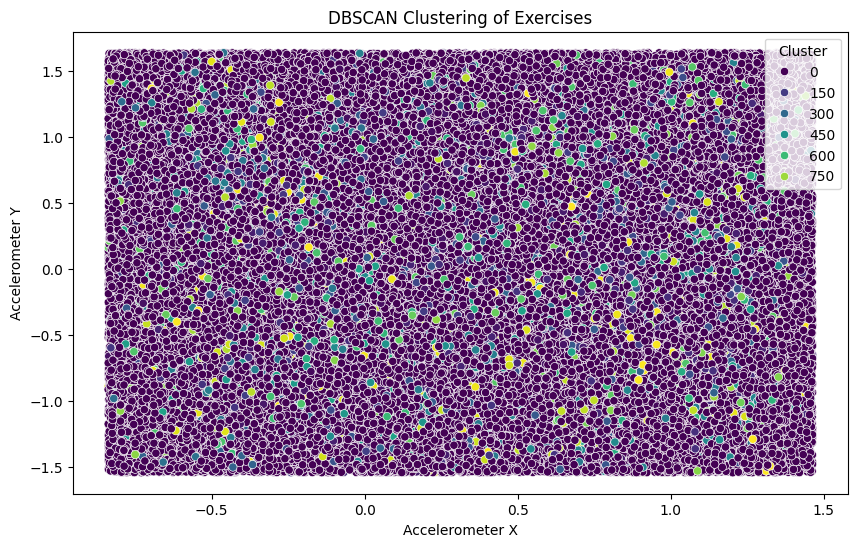

<ipython-input-2-6e469cdfbee9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Label'], order=data['Label'].value_counts().index, palette='coolwarm')


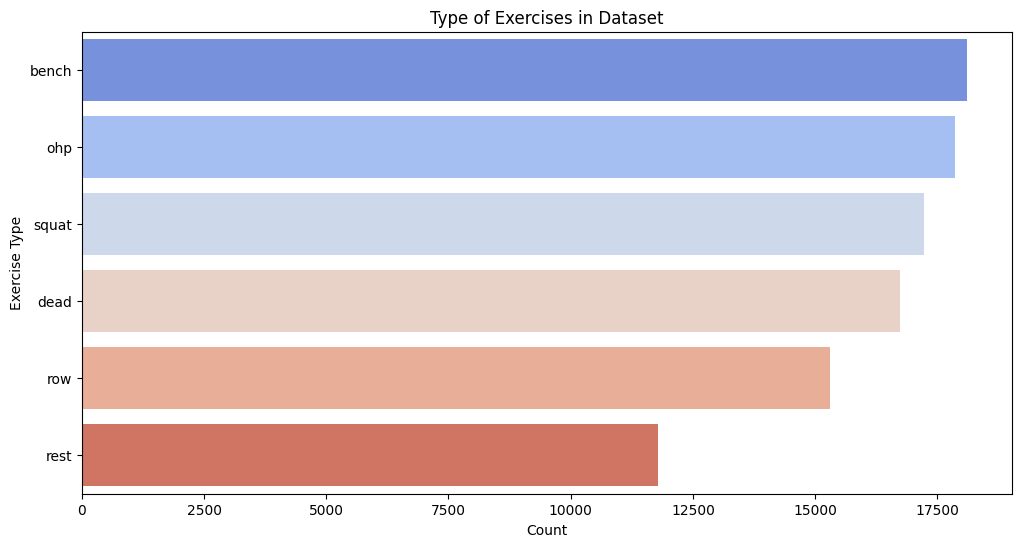

Label      bench     dead      ohp     rest      row    squat
Cluster                                                      
-1       15731.0  14509.0  15423.0  10123.0  13245.0  14907.0
 0           2.0      0.0      1.0      4.0      1.0      2.0
 1          18.0     13.0     15.0     12.0     11.0      9.0
 2           1.0      1.0      5.0      0.0      1.0      2.0
 3           6.0      1.0      3.0      1.0      5.0      3.0
...          ...      ...      ...      ...      ...      ...
 876         2.0      1.0      2.0      2.0      1.0      1.0
 877         1.0      1.0      1.0      2.0      4.0      1.0
 878         3.0      2.0      1.0      0.0      0.0      4.0
 879         4.0      1.0      2.0      0.0      2.0      1.0
 880         1.0      1.0      2.0      2.0      2.0      2.0

[882 rows x 6 columns]
         Accelerometer_x  Accelerometer_y  Accelerometer_z
Cluster                                                   
-1              0.672627         0.931424         0.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = pd.read_csv('/content/Data_97000_Samples (1) - Copy.csv')

print(data.info())
print(data.head())


data['epoch'] = pd.to_datetime(data['epoch (ms)'])

features = ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(data_scaled)

data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Accelerometer_x'], y=data['Accelerometer_y'], hue=data['Cluster'], palette='viridis')
plt.title('DBSCAN Clustering of Exercises')
plt.xlabel('Accelerometer X')
plt.ylabel('Accelerometer Y')
plt.legend(title='Cluster')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(y=data['Label'], order=data['Label'].value_counts().index, palette='coolwarm')
plt.title('Type of Exercises in Dataset')
plt.xlabel('Count')
plt.ylabel('Exercise Type')
plt.show()


cluster_counts = data.groupby(['Cluster', 'Label']).size().unstack().fillna(0)
print(cluster_counts)

intensity_per_cluster = data.groupby('Cluster')[['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z']].std()
print(intensity_per_cluster.sort_values(by=['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z'], ascending=False))

data.to_csv('Clustered_Exercises.csv', index=False)
print("Clustering completed and results saved!")


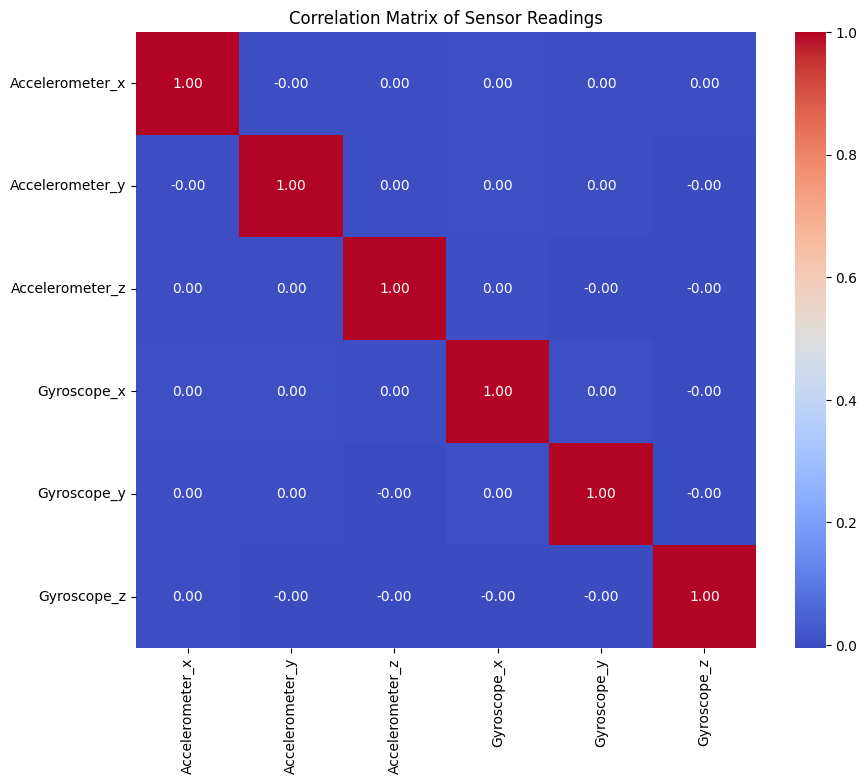

In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = pd.read_csv('Data_97000_Samples (1).csv')

data['epoch'] = pd.to_datetime(data['epoch (ms)'])

features = ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(data_scaled)


data['Cluster'] = clusters

correlation_matrix = data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sensor Readings')
plt.show()

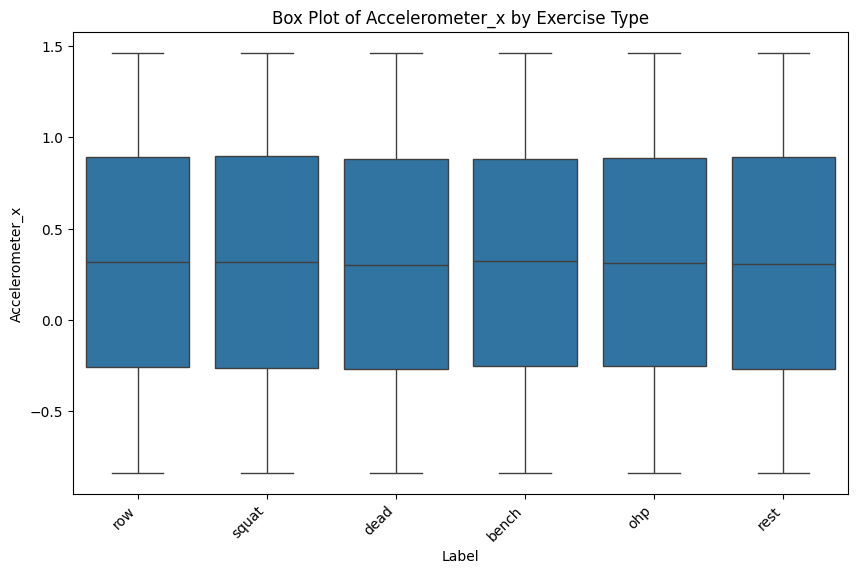

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='Label', y='Accelerometer_x', data=data)
plt.title('Box Plot of Accelerometer_x by Exercise Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

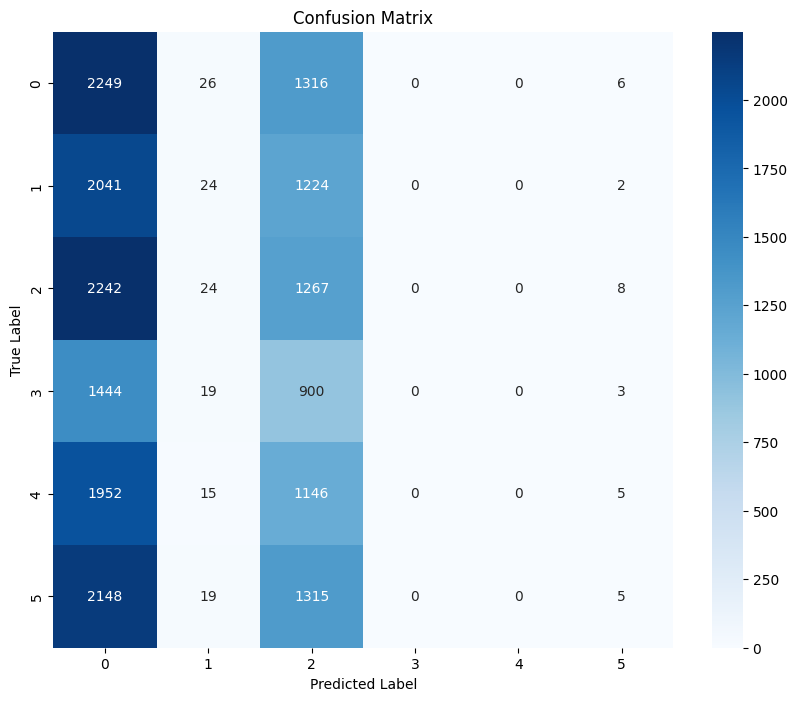

Accuracy: 0.1827319587628866


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
X = data[features]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [ ]:
# Load the dataset
data = pd.read_csv('Data_97000_Samples (1).csv')

# Display basic info
print(data.info())

# Show first few rows
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Accelerometer_x  97000 non-null  float64
 1   Accelerometer_y  97000 non-null  float64
 2   Accelerometer_z  97000 non-null  float64
 3   Gyroscope_x      97000 non-null  float64
 4   Gyroscope_y      97000 non-null  float64
 5   Gyroscope_z      97000 non-null  float64
 6   Participants     97000 non-null  object 
 7   Label            97000 non-null  object 
 8   Category         97000 non-null  object 
 9   Set              97000 non-null  int64  
 10  epoch (ms)       97000 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB
None
   Accelerometer_x  Accelerometer_y  Accelerometer_z  Gyroscope_x  \
0         0.026967         0.136783         0.190938  -211.192435   
1         0.508389         0.463488         0.248665  -156.964447   
2         1.251476 

In [ ]:
# Convert 'epoch (ms)' to datetime format
data['epoch'] = pd.to_datetime(data['epoch (ms)'])


In [ ]:
# Select sensor features for clustering
features = ['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z',
            'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(data_scaled)

# Store the cluster labels in the dataset
data['Cluster'] = clusters


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


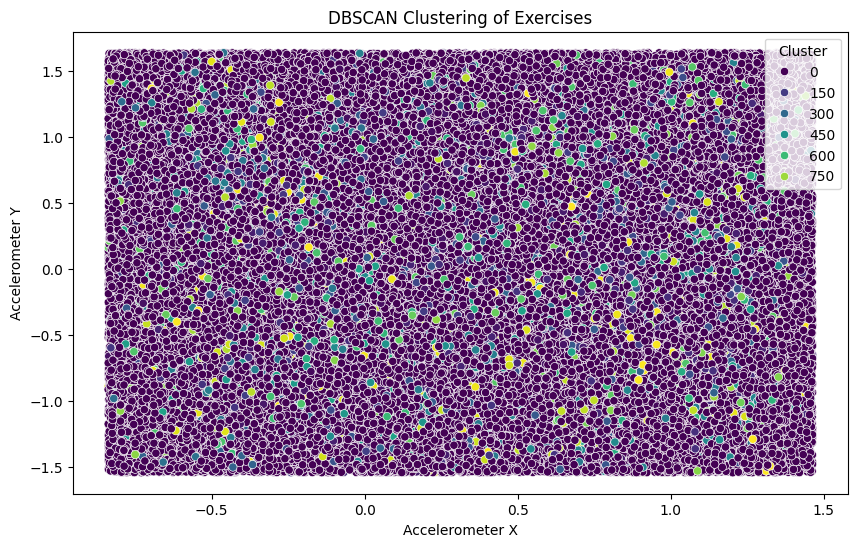

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Accelerometer_x'], y=data['Accelerometer_y'],
                hue=data['Cluster'], palette='viridis')
plt.title('DBSCAN Clustering of Exercises')
plt.xlabel('Accelerometer X')
plt.ylabel('Accelerometer Y')
plt.legend(title='Cluster')
plt.show()


<ipython-input-14-d9659832299f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Label'], order=data['Label'].value_counts().index, palette='coolwarm')


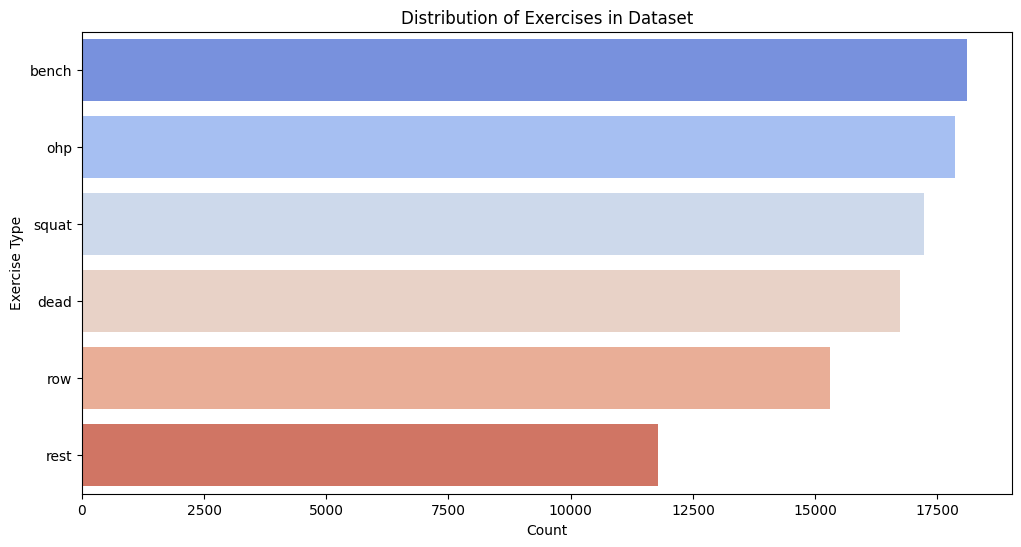

In [ ]:
# Count plot for exercise types
plt.figure(figsize=(12, 6))
sns.countplot(y=data['Label'], order=data['Label'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Exercises in Dataset')
plt.xlabel('Count')
plt.ylabel('Exercise Type')
plt.show()


In [ ]:
# Count how many exercises belong to each cluster
cluster_counts = data.groupby(['Cluster', 'Label']).size().unstack().fillna(0)
print(cluster_counts)


Label      bench     dead      ohp     rest      row    squat
Cluster                                                      
-1       15731.0  14509.0  15423.0  10123.0  13245.0  14907.0
 0           2.0      0.0      1.0      4.0      1.0      2.0
 1          18.0     13.0     15.0     12.0     11.0      9.0
 2           1.0      1.0      5.0      0.0      1.0      2.0
 3           6.0      1.0      3.0      1.0      5.0      3.0
...          ...      ...      ...      ...      ...      ...
 876         2.0      1.0      2.0      2.0      1.0      1.0
 877         1.0      1.0      1.0      2.0      4.0      1.0
 878         3.0      2.0      1.0      0.0      0.0      4.0
 879         4.0      1.0      2.0      0.0      2.0      1.0
 880         1.0      1.0      2.0      2.0      2.0      2.0

[882 rows x 6 columns]


In [ ]:
# Compute standard deviation for each cluster
intensity_per_cluster = data.groupby('Cluster')[['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z']].std()

# Sort clusters by intensity
print(intensity_per_cluster.sort_values(by=['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z'], ascending=False))


         Accelerometer_x  Accelerometer_y  Accelerometer_z
Cluster                                                   
-1              0.672627         0.931424         0.488968
 22             0.354102         0.207054         0.133811
 181            0.275331         0.203449         0.112542
 104            0.252488         0.172690         0.112552
 10             0.249227         0.214835         0.111104
...                  ...              ...              ...
 560            0.053588         0.103634         0.059486
 457            0.053182         0.178393         0.054345
 730            0.051056         0.158624         0.095635
 178            0.046694         0.172666         0.078303
 176            0.038400         0.153525         0.059557

[882 rows x 3 columns]


In [ ]:
# Save the clustered dataset
data.to_csv('Clustered_Exercises.csv', index=False)
print("Clustering completed and results saved!")


Clustering completed and results saved!
